In [90]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import linear_model
%matplotlib inline
from statsmodels.graphics.regressionplots import influence_plot

In [91]:
df_housing = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

In [92]:
df_housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [93]:
df_housing['Propertycount_perc'] = df_housing.Propertycount.apply(lambda x: 1 / x)

In [94]:
df_housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Propertycount_perc
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0.000249
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0.000249
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0.000249
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,0.000648
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,0.000289


In [95]:
df_housing['Date'] = pd.to_datetime(df_housing.Date)

In [96]:
# look at overall time trends, trends by year, by month
df_housing['year'] = df_housing['Date'].dt.year
df_housing['month'] = df_housing['Date'].dt.month
df_housing['month_year'] = df_housing['Date'].apply(lambda x: x.strftime('%B-%Y'))   

In [97]:
df_trend = df_housing.groupby(['month_year'],as_index=False).mean()

In [98]:
df_trend.month_year.unique()

array(['April-2016', 'April-2017', 'April-2018', 'August-2016',
       'August-2017', 'August-2018', 'December-2016', 'December-2017',
       'December-2018', 'February-2017', 'February-2018', 'January-2016',
       'January-2017', 'January-2018', 'July-2016', 'July-2017',
       'July-2018', 'June-2016', 'June-2017', 'June-2018', 'March-2016',
       'March-2017', 'March-2018', 'May-2016', 'May-2017', 'May-2018',
       'November-2016', 'November-2017', 'November-2018', 'October-2016',
       'October-2017', 'October-2018', 'September-2016', 'September-2017',
       'September-2018'], dtype=object)

In [99]:
month_year_order = ['January-2016','February-2016','March-2016','April-2016', 'May-2016', 'June-2016','July-2016', 
                    'August-2016', 'September-2016', 'October-2016', 'November-2016', 'December-2016',
                    'January-2017', 'February-2017','March-2017', 'April-2017','May-2017', 'June-2017','July-2017',
                    'August-2017', 'September-2017','October-2017', 'November-2017','December-2017',
                    'January-2018','February-2018','March-2018', 'April-2018', 'May-2018','June-2018','July-2018',
                    'August-2018','September-2018','October-2018','November-2018', 'December-2018']

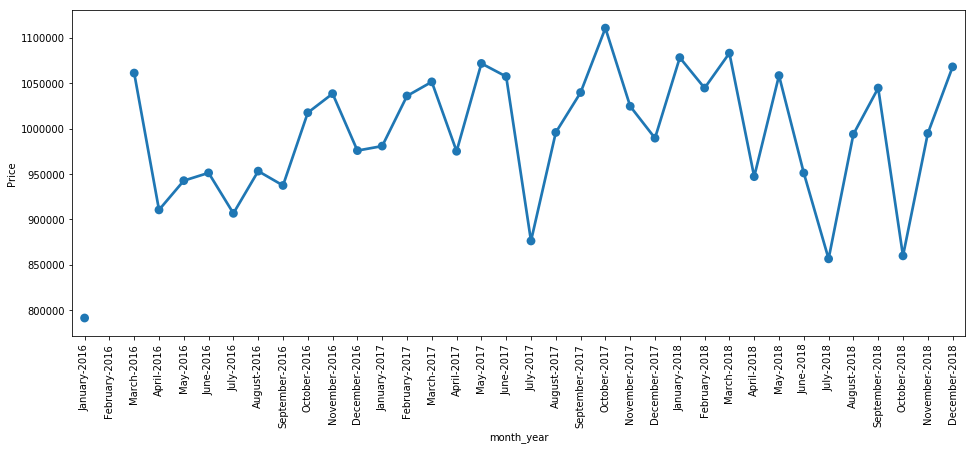

In [100]:
plt.figure(figsize=(16,6))
sns.pointplot(x='month_year', y='Price', data=df_trend,order=month_year_order)
plt.xticks(rotation=90)
plt.show()

In [101]:
df_trend_year = df_housing.groupby(['year'],as_index=False).mean()

In [102]:
df_housing[['year','Price']].groupby('year').agg([np.mean,np.std])

Price               
              mean            std
year                             
2016  9.667183e+05  583088.958433
2017  1.019089e+06  613566.762636
2018  9.964609e+05  573483.569839

In [103]:
df_housing['log_Price'] = df_housing.Price.apply(lambda x: np.log(x))

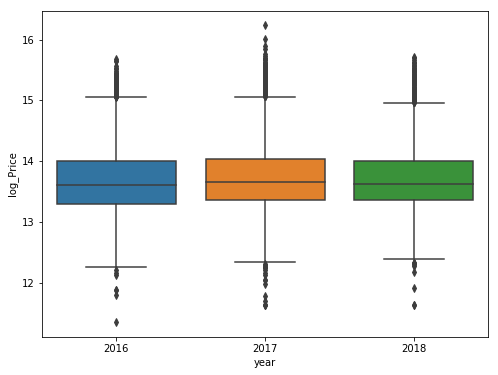

In [104]:
plt.figure(figsize=(8,6))
sns.boxplot(x='year', y='log_Price', data=df_housing)
plt.show()

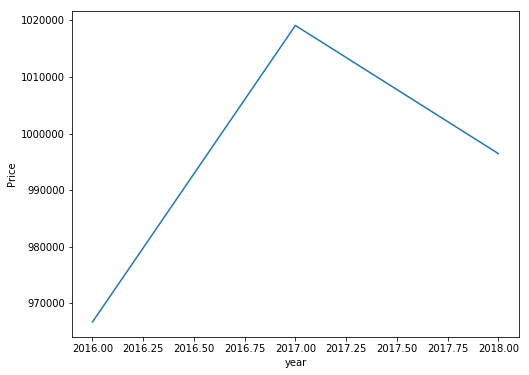

In [105]:
plt.figure(figsize=(8,6))
sns.lineplot(x='year', y='Price', data=df_trend_year)
plt.show()

It seems year doesn't matter!

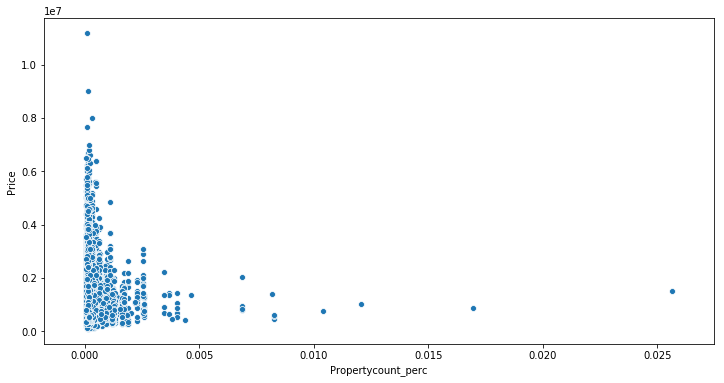

In [140]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Propertycount_perc', y='Price', data=df_housing)
plt.show()

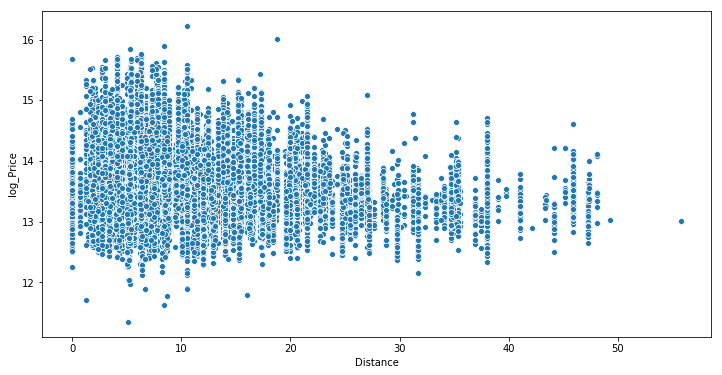

In [144]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Distance', y='log_Price', data=df_housing)
plt.show()

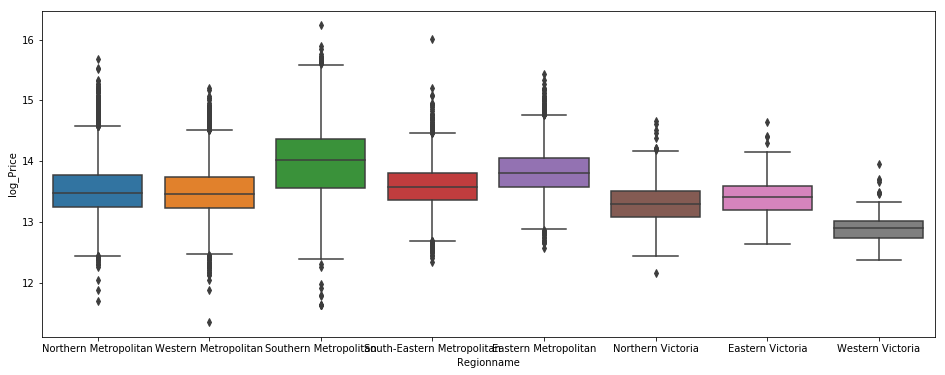

In [147]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Regionname', y='log_Price', data=df_housing)
plt.show()

In [159]:
df_suburb = df_housing[['Suburb','Price']].groupby(['Suburb']).mean()

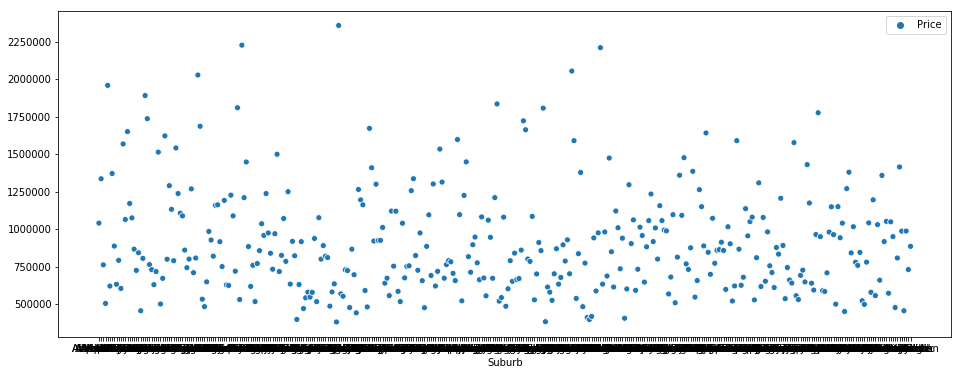

In [161]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df_suburb)
plt.show()

In [106]:
df_housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Propertycount_perc,year,month,month_year,log_Price
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0.000249,2017,1,January-2017,14.214287
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0.000249,2017,1,January-2017,14.014361
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0.000249,2017,1,January-2017,14.166167
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,0.000648,2017,1,January-2017,14.230926
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,0.000289,2017,1,January-2017,13.415033


In [107]:
df_housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea', 'Propertycount_perc', 'year', 'month', 'month_year',
       'log_Price'],
      dtype='object')

In [108]:
df_housing = df_housing.dropna(subset=['log_Price'])

In [187]:
X = df_housing[['Rooms', 'Type', 'Method', 'Regionname', 'Distance','Propertycount_perc','month']]
Y = df_housing['log_Price']
X = pd.get_dummies(X)

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3)

In [189]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6337275299359031

In [190]:
y_pred = lr.predict(X_test)

In [191]:
df_coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
df_coeff  

,Coefficient
Rooms,0.215264
Distance,-0.036953
Propertycount_perc,15.064183
month,0.001000
Type_h,0.212393
Type_t,0.048974
Type_u,-0.261367
Method_PI,-0.019546
Method_S,0.031596
Method_SA,-0.030647


In [192]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.22903807400125328
Mean Squared Error: 0.09031323561278298
Root Mean Squared Error: 0.30052160590011323


In [193]:
df_housing.log_Price.describe()

count    48433.000000
mean        13.681025
std          0.497138
min         11.350407
25%         13.337475
50%         13.629181
75%         14.014361
max         16.231424
Name: log_Price, dtype: float64

In [194]:
# use influence plots
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(y_test,y_pred)